<a href="https://colab.research.google.com/github/hobediente/eCommerce_AB_Test/blob/master/Capstone_1_Nov_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import appropriate libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path= "/content/drive/My Drive/2019-Nov.csv"
df = pd.read_csv(path)

In [0]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [0]:
# Get head
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [0]:
# check for nulls
df.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4560089
brand            1986029
price                  0
user_id                0
user_session         813
dtype: int64

In [0]:
# check rows for negative prices with loc statement 

In [0]:
# drop columns I don't need
dfd= df.drop(['event_time', 'product_id', 'category_id', 'category_code', 'brand', 'user_session'], axis=1)

In [0]:
# get info on the new columns
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 3 columns):
event_type    object
price         float64
user_id       int64
dtypes: float64(1), int64(1), object(1)
memory usage: 106.1+ MB


In [0]:
dfd.head()

,event_type,price,user_id
0,view,0.32,562076640
1,cart,2.38,553329724
2,view,22.22,556138645
3,cart,3.16,564506666
4,remove_from_cart,3.33,553329724


Ho: Removing something from a cart and adding something to a cart equally indicate a purchase 


Ha: Removing something from a cart better indicates a purchase than adding something to a cart 

In [0]:
# boc xplot does 1 and a half standard deviations away--for my dist and can set that 10 whis=10 

In [0]:
# change all values to 1
#dfd.loc[(dfd.price > 0),'price']=1
# print (dfd)

               event_type  price    user_id
0                    view    1.0  562076640
1                    cart    1.0  553329724
2                    view    1.0  556138645
3                    cart    1.0  564506666
4        remove_from_cart    1.0  553329724
...                   ...    ...        ...
4635832              view    1.0  457678989
4635833              view    1.0  422196217
4635834              view    1.0  572579084
4635835              view    1.0  540006764
4635836              view    1.0  579969854

[4635837 rows x 3 columns]


In [0]:
# set every price to 1
dfd.loc[:, 'price']=1
print (dfd)

               event_type  price    user_id
0                    view      1  562076640
1                    cart      1  553329724
2                    view      1  556138645
3                    cart      1  564506666
4        remove_from_cart      1  553329724
...                   ...    ...        ...
4635832              view      1  457678989
4635833              view      1  422196217
4635834              view      1  572579084
4635835              view      1  540006764
4635836              view      1  579969854

[4635837 rows x 3 columns]


In [0]:
# create new df for pivoted data
dfp= pd.pivot_table(dfd, index='user_id', columns='event_type', values='price', aggfunc='sum')

In [0]:
# reset index
dfp = dfp.reset_index()

In [0]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368232 entries, 0 to 368231
Data columns (total 5 columns):
user_id             368232 non-null int64
cart                95939 non-null float64
purchase            31524 non-null float64
remove_from_cart    54628 non-null float64
view                355643 non-null float64
dtypes: float64(4), int64(1)
memory usage: 14.0 MB


In [0]:
dfp.head()

event_type,user_id,cart,purchase,remove_from_cart,view
0,1120748,NaN,NaN,NaN,1.0
1,1458813,NaN,NaN,NaN,31.0
2,5493470,5.0,NaN,NaN,5.0
3,6217356,1.0,NaN,NaN,NaN
4,8072106,NaN,NaN,NaN,1.0


In [0]:
# replace null values with 0
dfp.fillna(value=0, inplace=True)

In [0]:
dfp.head()

event_type,user_id,cart,purchase,remove_from_cart,view
0,1120748,0.0,0.0,0.0,1.0
1,1458813,0.0,0.0,0.0,31.0
2,5493470,5.0,0.0,0.0,5.0
3,6217356,1.0,0.0,0.0,0.0
4,8072106,0.0,0.0,0.0,1.0


In [0]:
# make sure user_id is unique value
dfp['user_id'].value_counts()

566757375    1
572805418    1
572963458    1
571558506    1
561439369    1
            ..
576329729    1
575520285    1
548251166    1
571846175    1
494927872    1
Name: user_id, Length: 368232, dtype: int64

In [0]:
# rename event_type to something else 
dfp.columns = ['user_id', 'cart', 'purchase','remove_from_cart', 'view']

In [0]:
# make sure event_type is gone
dfp.head()

,user_id,cart,purchase,remove_from_cart,view
0,1120748,0.0,0.0,0.0,1.0
1,1458813,0.0,0.0,0.0,31.0
2,5493470,5.0,0.0,0.0,5.0
3,6217356,1.0,0.0,0.0,0.0
4,8072106,0.0,0.0,0.0,1.0


In [0]:
# check out range etc.
dfp.describe()

,user_id,cart,purchase,remove_from_cart,view
count,3.682320e+05,368232.000000,368232.000000,368232.000000,368232.000000
mean,5.351189e+08,3.562447,0.875581,2.513310,5.638109
std,6.914056e+07,15.531020,4.566144,17.653779,25.881554
min,1.120748e+06,0.000000,0.000000,0.000000,0.000000
25%,5.276206e+08,0.000000,0.000000,0.000000,1.000000
50%,5.677102e+08,0.000000,0.000000,0.000000,1.000000
75%,5.730176e+08,1.000000,0.000000,0.000000,3.000000
max,5.799699e+08,1682.000000,438.000000,2480.000000,9336.000000


In [0]:
#assign an extra A/B column for purchase
def buy(purchase):
    if purchase >0:
        return 'yes'
    else:
        return 'no'
dfp['buy']= dfp['purchase'].apply(buy)
dfp.head()

,user_id,cart,purchase,remove_from_cart,view,buy
0,1120748,0.0,0.0,0.0,1.0,no
1,1458813,0.0,0.0,0.0,31.0,no
2,5493470,5.0,0.0,0.0,5.0,no
3,6217356,1.0,0.0,0.0,0.0,no
4,8072106,0.0,0.0,0.0,1.0,no


In [0]:
#assign an extra A/B column for remove_from_cart
def remove(remove_from_cart):
    if remove_from_cart >0:
        return 'yes'
    else:
        return 'no'
dfp['remove']= dfp['remove_from_cart'].apply(remove)
dfp.head()

,user_id,cart,purchase,remove_from_cart,view,buy,remove
0,1120748,0.0,0.0,0.0,1.0,no,no
1,1458813,0.0,0.0,0.0,31.0,no,no
2,5493470,5.0,0.0,0.0,5.0,no,no
3,6217356,1.0,0.0,0.0,0.0,no,no
4,8072106,0.0,0.0,0.0,1.0,no,no


In [0]:
#split data into 2 groups
df_pno= dfp[dfp['purchase']==0]
df_pyes= dfp[dfp['purchase']>0]

In [0]:
# descrip stat
df_pyes.head()

,user_id,cart,purchase,remove_from_cart,view,buy,remove
6,9794320,39.0,4.0,31.0,75.0,yes,yes
7,10079204,2.0,2.0,0.0,0.0,yes,no
8,10280338,38.0,16.0,13.0,42.0,yes,yes
19,15781728,15.0,2.0,3.0,8.0,yes,yes
23,19762782,46.0,8.0,17.0,11.0,yes,yes


DescribeResult(nobs=31524, minmax=(0.0, 2480.0), mean=17.36936936936937, variance=2207.269202267013, skewness=16.520140286267846, kurtosis=553.9617569815751)


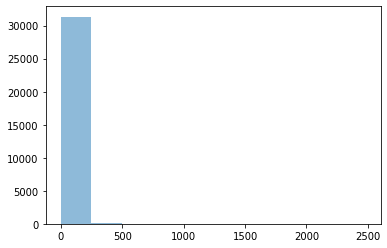

In [0]:
#check distribution of remove_from_cart for both groups
plt.hist(df_pyes['remove_from_cart'], alpha= .5)

print(stats.describe(df_pyes['remove_from_cart']))

DescribeResult(nobs=336708, minmax=(0.0, 2407.0), mean=1.1224235836392364, variance=111.58902718820464, skewness=62.12770080133843, kurtosis=9714.148329641795)


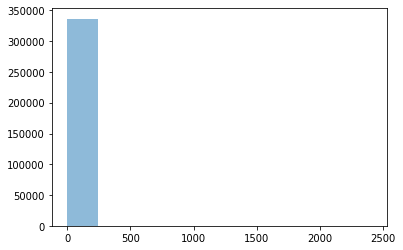

In [0]:
plt.hist(df_pno['remove_from_cart'], alpha= .5)

print(stats.describe(df_pno['remove_from_cart']))

In [0]:
# data is not normally distributed so cannot run ttest--> instead run Kurskal
stats.kruskal(df_pyes['remove_from_cart'], df_pno['remove_from_cart'])

KruskalResult(statistic=123079.0232377109, pvalue=0.0)

In [0]:
# sig difference between means --> reject null hypoth

remove from cart purchase correlation 0.37529942673640854


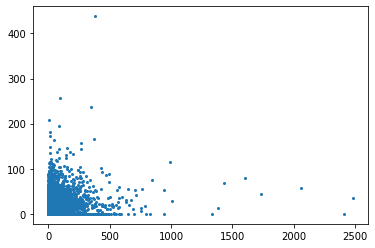

In [0]:
plt.plot(dfp['remove_from_cart'], dfp['purchase'],"o", markersize=2 )
print('remove from cart purchase correlation', dfp['remove_from_cart'].corr(dfp['purchase']))

purchase remove from cart correlation 0.37529942673640854


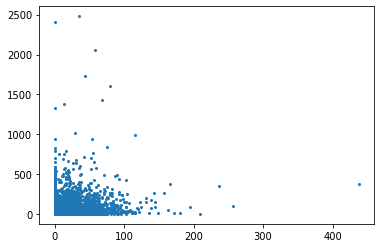

In [0]:
plt.plot(dfp['purchase'], dfp['remove_from_cart'],"o", markersize=2 )
print('purchase remove from cart correlation', dfp['remove_from_cart'].corr(dfp['purchase']))

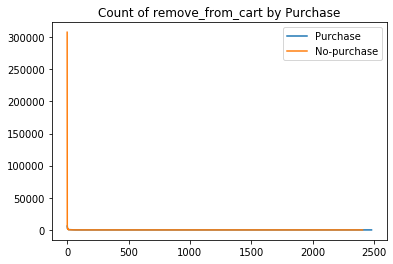

In [0]:
# create line graph
plt.plot(dfp.loc[dfp['purchase'] > 0].groupby('remove_from_cart')['remove_from_cart'].count(), label='Purchase')
plt.plot(dfp.loc[dfp['purchase'] == 0 ].groupby('remove_from_cart')['remove_from_cart'].count(), label='No-purchase')
plt.title('Count of remove_from_cart by Purchase')
plt.legend()
plt.show()

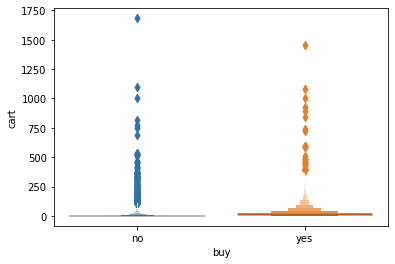

In [0]:
sns.boxenplot('buy', 'cart', data=dfp)
plt.show()

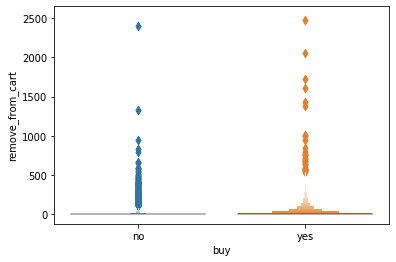

In [0]:
sns.boxenplot('buy', 'remove_from_cart', data=dfp)
plt.show()

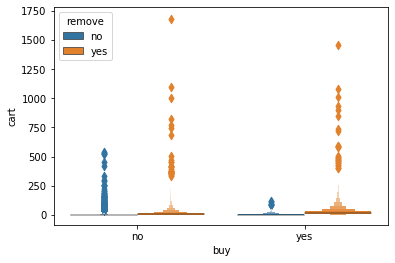

In [0]:
sns.boxenplot('buy', 'cart', hue='remove', data=dfp)
plt.show()

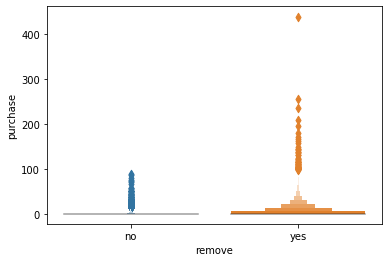

In [0]:
sns.boxenplot('remove', 'purchase', data=dfp)
plt.show()

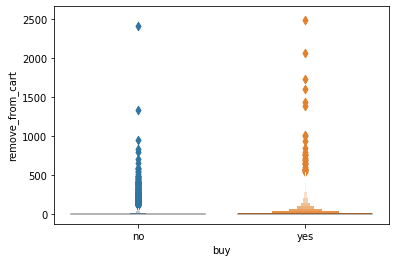

In [0]:
sns.boxenplot('buy', 'remove_from_cart', data=dfp)
plt.show()